

!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1

!pip install -q diffusers transformers accelerate
!pip install -q ultralytics==8.1.0
!pip install -q autodistill autodistill-grounding-dino roboflow

print("Libraries installed. PLEASE RESTART RUNTIME!")


In [3]:


!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1

!pip install -q diffusers transformers accelerate
!pip install -q ultralytics==8.1.0
!pip install -q autodistill autodistill-grounding-dino roboflow

print("Libraries installed. PLEASE RESTART RUNTIME!")

  Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.4 kB)
Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl (906.4 MB)
Using cached torchvision-0.20.1-cp312-cp312-manylinux1_x86_64.whl (7.2 MB)
Using cached torchaudio-2.5.1-cp312-cp312-manylinux1_x86_64.whl (3.4 MB)
Libraries installed. PLEASE RESTART RUNTIME!


In [1]:
# FIX: Downgrade PyTorch to a YOLOv8-compatible version

!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1

Found existing installation: torch 2.5.1
Uninstalling torch-2.5.1:
  Successfully uninstalled torch-2.5.1
Found existing installation: torchvision 0.20.1
Uninstalling torchvision-0.20.1:
  Successfully uninstalled torchvision-0.20.1
Found existing installation: torchaudio 2.5.1
Uninstalling torchaudio-2.5.1:
  Successfully uninstalled torchaudio-2.5.1
  Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.4 kB)
Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl (906.4 MB)
Using cached torchvision-0.20.1-cp312-cp312-manylinux1_x86_64.whl (7.2 MB)
Using cached torchaudio-2.5.1-cp312-cp312-manylinux1_x86_64.whl (3.4 MB)


In [2]:
# ==============================
# Block 1: Mount Google Drive & create project folders
# ==============================

from google.colab import drive
import os

drive.mount('/content/drive')

PROJECT_ROOT = "/content/drive/MyDrive/ChildSafetyProject_SDXL"

RAW_IMAGES_DIR = os.path.join(PROJECT_ROOT, "raw_images")
YOLO_DATASET_DIR = os.path.join(PROJECT_ROOT, "yolo_dataset")

os.makedirs(RAW_IMAGES_DIR, exist_ok=True)
os.makedirs(YOLO_DATASET_DIR, exist_ok=True)

print("Project folders created:")
print(PROJECT_ROOT)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project folders created:
/content/drive/MyDrive/ChildSafetyProject_SDXL


In [3]:
# ==============================
# Block 3: SDXL image generation (children rooms)
# ==============================

import torch
from diffusers import StableDiffusionXLPipeline, DPMSolverMultistepScheduler
import os
import random

MODEL_ID = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionXLPipeline.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)

pipe.enable_model_cpu_offload()
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

NEGATIVE_PROMPT = (
    "cartoon, illustration, drawing, anime, low quality, blurry, "
    "distorted, unrealistic, deformed, extra objects"
)

prompts = {
    "scissors": [
        "A realistic photo of a child's bedroom with toys and a bed, "
        "sharp metal scissors lying on the floor near colorful toys, "
        "natural daylight, photorealistic"
    ],
    "battery": [
        "A realistic nursery room with toys, "
        "a small button battery on the carpet near children's toys, "
        "natural lighting, photorealistic"
    ],
    "detergent": [
        "A realistic children's playroom, "
        "a colorful detergent bottle on a low shelf within child's reach, "
        "natural light, photorealistic"
    ],
    "wires": [
        "A realistic child's bedroom with toys, "
        "a damaged electrical power cord with exposed wires on the floor, "
        "natural lighting, realistic photo"
    ]
}

IMAGES_PER_CLASS = 25

for label, plist in prompts.items():
    for i in range(IMAGES_PER_CLASS):
        image = pipe(
            prompt=random.choice(plist),
            negative_prompt=NEGATIVE_PROMPT,
            num_inference_steps=30,
            guidance_scale=7.0,
            height=1024,
            width=1024
        ).images[0]

        image.save(os.path.join(RAW_IMAGES_DIR, f"{label}_{i}.jpg"))

print("SDXL image generation completed.")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

SDXL image generation completed.


In [10]:
# ==============================
# Block 4: Automatic labeling
# ==============================

from autodistill_grounding_dino import GroundingDINO
from autodistill.detection import CaptionOntology
import os

# Ensure PROJECT_ROOT, RAW_IMAGES_DIR, YOLO_DATASET_DIR are defined for standalone execution
# This assumes Google Drive is already mounted (from a previous cell or manually).
PROJECT_ROOT = "/content/drive/MyDrive/ChildSafetyProject_SDXL"
RAW_IMAGES_DIR = os.path.join(PROJECT_ROOT, "raw_images")
YOLO_DATASET_DIR = os.path.join(PROJECT_ROOT, "yolo_dataset")
os.makedirs(RAW_IMAGES_DIR, exist_ok=True)
os.makedirs(YOLO_DATASET_DIR, exist_ok=True)

ontology = CaptionOntology({
    "scissors": "Sharp Object",
    "battery": "Choking Hazard",
    "detergent bottle": "Chemical Danger",
    "exposed electrical wire": "Electrical Hazard"
})

model = GroundingDINO(ontology=ontology)

model.label(
    input_folder=RAW_IMAGES_DIR,
    output_folder=YOLO_DATASET_DIR,
    extension=".jpg"
)

print("Labeling completed.")

# --- Added check ---
# Verify if images were actually written to the YOLO_DATASET_DIR/images directory
output_images_path = os.path.join(YOLO_DATASET_DIR, "images")
if os.path.exists(output_images_path):
    labeled_images = [f for f in os.listdir(output_images_path) if f.endswith(".jpg")]
    print(f"Found {len(labeled_images)} labeled images in {output_images_path} after labeling.")
    if not labeled_images:
        print("WARNING: The labeled images directory is empty. This might cause issues in subsequent steps.")
else:
    print(f"WARNING: The output images directory {output_images_path} was not created.")


trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Labeling /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_0.jpg:   0%|          | 0/100 [00:00<?, ?it/s]The `device` argument 

Found /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/train/images/scissors_5.jpg as already present, not moving anything to /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/train/images
Found /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/train/labels/scissors_5.txt as already present, not moving anything to /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/train/labels
Found /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/train/images/battery_10.jpg as already present, not moving anything to /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/train/images
Found /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/train/labels/battery_10.txt as already present, not moving anything to /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/train/labels
Found /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/train/images/detergent_23.jpg as already present, not moving anything to /content/drive/MyDriv

In [15]:
 #==============================
# Block 5: Train/Val split
# ==============================

import os, shutil, random
random.seed(42)

images_dir = os.path.join(YOLO_DATASET_DIR, "images")
labels_dir = os.path.join(YOLO_DATASET_DIR, "labels")

for s in ["train", "val"]:
    os.makedirs(os.path.join(images_dir, s), exist_ok=True)
    os.makedirs(os.path.join(labels_dir, s), exist_ok=True)

imgs = [f for f in os.listdir(images_dir) if f.endswith(".jpg")]
random.shuffle(imgs)

split = int(0.8 * len(imgs))
train, val = imgs[:split], imgs[split:]

def move(imgs, split):
    for img in imgs:
        shutil.move(os.path.join(images_dir, img), os.path.join(images_dir, split, img))
        shutil.move(
            os.path.join(labels_dir, img.replace(".jpg", ".txt")),
            os.path.join(labels_dir, split, img.replace(".jpg", ".txt"))
        )

move(train, "train")
move(val, "val")

print("Train/Val split done.")


Train/Val split done.


In [16]:
# ==============================
# Block 6: Create data.yaml
# ==============================

import yaml
import os

yaml_path = os.path.join(YOLO_DATASET_DIR, "data.yaml")

data = {
    "path": YOLO_DATASET_DIR,
    "train": "train/images",  # Corrected path based on Autodistill's output structure
    "val": "valid/images",    # Corrected path based on Autodistill's output structure
    "names": [
        "Sharp Object",
        "Choking Hazard",
        "Chemical Danger",
        "Electrical Hazard"
    ]
}

with open(yaml_path, "w") as f:
    yaml.dump(data, f)

print("data.yaml created.")


data.yaml created.


In [21]:
# ==============================
# Block 7: Train YOLOv8
# ==============================

from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    batch=8,
    device=0,
    project="child_safety_project_sdxl", # Changed from PROJECT_ROOT to a valid project name
    name="yolov8_child_safety_sdxl"
)

print("Training finished.")


New https://pypi.org/project/ultralytics/8.3.240 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.0 🚀 Python-3.12.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/data.yaml, epochs=50, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=child_safety_project_sdxl, name=yolov8_child_safety_sdxl6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnost

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/train/labels.cache... 94 images, 5 backgrounds, 0 corrupt: 100%|██████████| 94/94 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



Argument(s) 'quality_lower' are not valid for transform ImageCompression
Got processor for bboxes, but no transform to process it.
val: Scanning /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/valid/labels.cache... 34 images, 2 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]


Plotting labels to child_safety_project_sdxl/yolov8_child_safety_sdxl6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.21G      1.058      3.999      1.031         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]


                   all         34        229    0.00224      0.194     0.0178      0.014

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.29G     0.9447      3.014      1.009         48        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         34        229     0.0206      0.366      0.215      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       1.2G      0.912       2.55     0.9889         64        640: 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]

                   all         34        229      0.141      0.322      0.252      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.2G     0.9469      2.369      1.015        121        640: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]

                   all         34        229     0.0242      0.533      0.269       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.25G     0.8831      1.889     0.9849         44        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]

                   all         34        229      0.659      0.142      0.287      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.21G     0.9164      1.987       1.01         28        640: 100%|██████████| 12/12 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]


                   all         34        229      0.605      0.124      0.281       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.22G     0.9292      1.807     0.9962         42        640: 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]

                   all         34        229      0.581      0.261      0.298      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.31G     0.9228       1.66     0.9924         75        640: 100%|██████████| 12/12 [00:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.80it/s]

                   all         34        229      0.533      0.288      0.282       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.24G     0.8785      1.627     0.9857         52        640: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         34        229        0.6       0.33      0.337      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.24G     0.8798      1.514     0.9627         55        640: 100%|██████████| 12/12 [00:02<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.46it/s]

                   all         34        229      0.602      0.363      0.348      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.22G     0.8201      1.583     0.9674         40        640: 100%|██████████| 12/12 [00:02<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:00<00:00,  3.13it/s]


KeyboardInterrupt: 

In [19]:
# ==============================
# Block 8: Evaluation
# ==============================

metrics = model.val(data=yaml_path)

print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.p.mean():.4f}")
print(f"Recall: {metrics.box.r.mean():.4f}")


Ultralytics YOLOv8.1.0 🚀 Python-3.12.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/ChildSafetyProject_SDXL/yolo_dataset/valid/labels.cache... 34 images, 2 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


                   all         34        229      0.947      0.587      0.655      0.589
          Sharp Object         34          1          1          0          0          0
        Choking Hazard         34         40      0.966        0.8      0.874      0.824
       Chemical Danger         34        171      0.945      0.899      0.958      0.885
     Electrical Hazard         34         17      0.878      0.647      0.786      0.647
Speed: 1.1ms preprocess, 37.3ms inference, 0.0ms loss, 20.7ms postprocess per image
Results saved to child_safety_project_sdxl/yolov8_child_safety_sdxl52
mAP50: 0.6547
mAP50-95: 0.5890
Precision: 0.9473
Recall: 0.5866


In [25]:
# ==============================
# Block 9: Inference visualization
# ==============================

import os
import matplotlib.pyplot as plt # Import matplotlib for displaying images

test_imgs = [os.path.join(RAW_IMAGES_DIR, f) for f in os.listdir(RAW_IMAGES_DIR)[:5]]

for img_path in test_imgs:
    results = model(img_path, conf=0.3)
    # Use .plot() to get the annotated image as a NumPy array
    # Then display it using matplotlib
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        plt.imshow(im_array[..., ::-1])  # Convert BGR to RGB for matplotlib
        plt.axis('off') # Hide axes
        plt.show() # Display the image



image 1/1 /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_0.jpg: 640x640 2 Electrical Hazards, 9.7ms
Speed: 3.3ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_1.jpg: 640x640 (no detections), 17.8ms
Speed: 6.7ms preprocess, 17.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_2.jpg: 640x640 1 Choking Hazard, 7.5ms
Speed: 3.2ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_3.jpg: 640x640 (no detections), 7.5ms
Speed: 3.0ms preprocess, 7.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_4.jpg: 640x640 1 Chemical Danger, 7.5ms
Speed: 2.9ms preprocess, 7

Processing: /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_0.jpg

image 1/1 /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_0.jpg: 640x640 2 Electrical Hazards, 7.5ms
Speed: 3.1ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


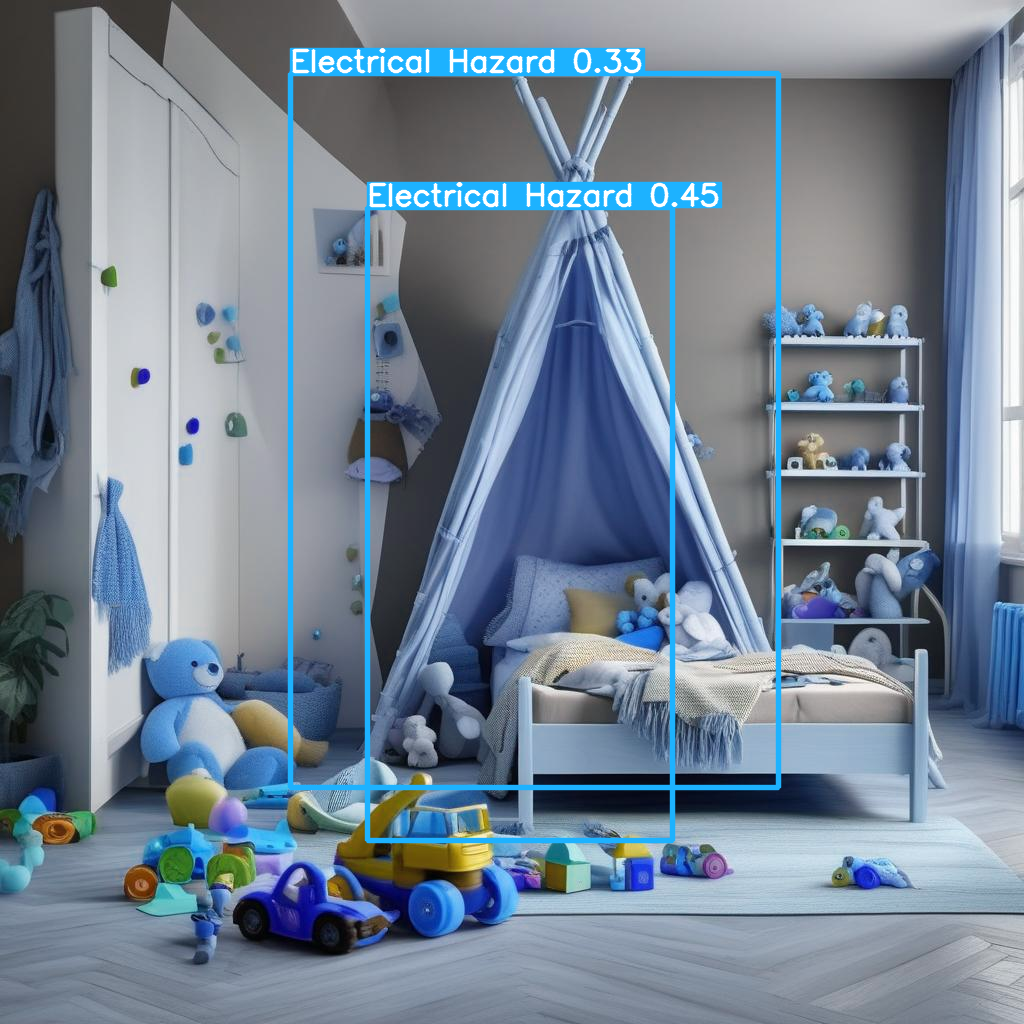

Processing: /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_1.jpg

image 1/1 /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_1.jpg: 640x640 (no detections), 10.8ms
Speed: 5.3ms preprocess, 10.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


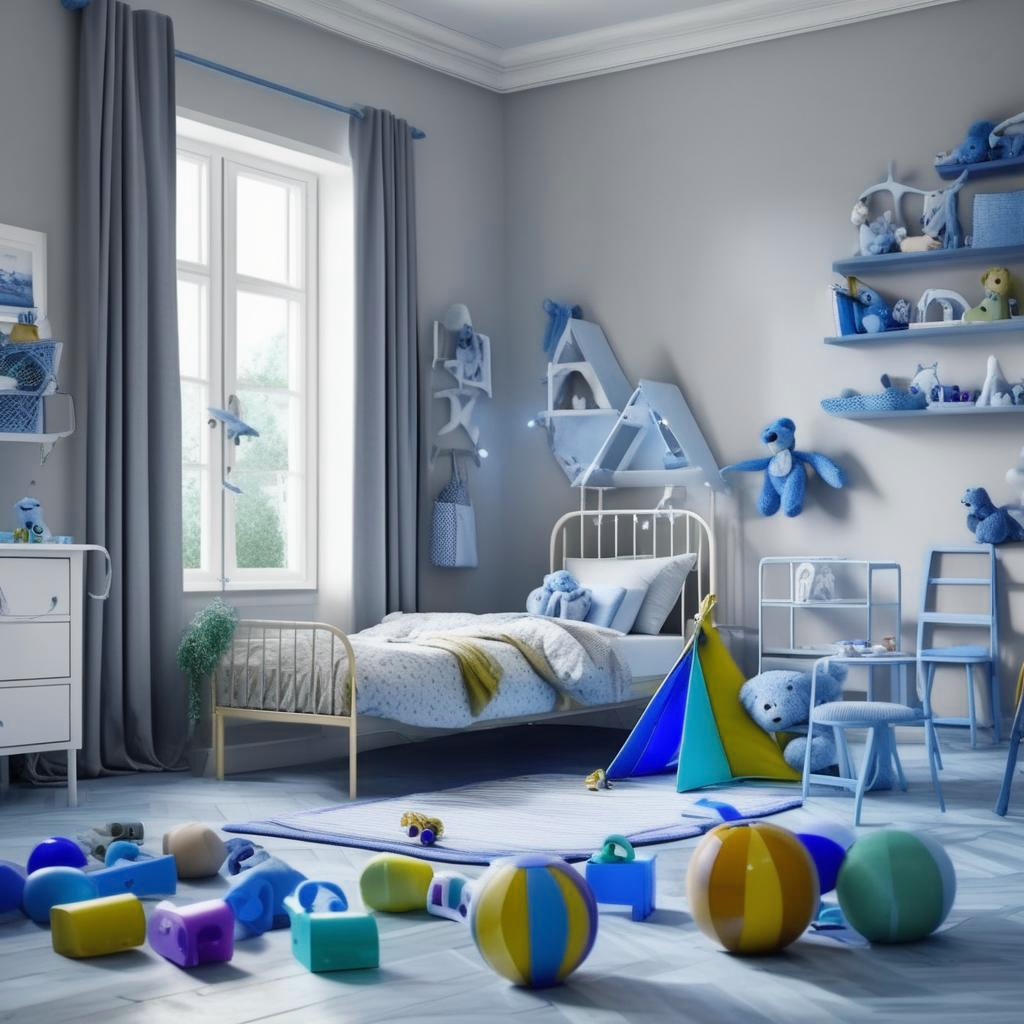

Processing: /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_2.jpg

image 1/1 /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_2.jpg: 640x640 1 Choking Hazard, 11.0ms
Speed: 6.4ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


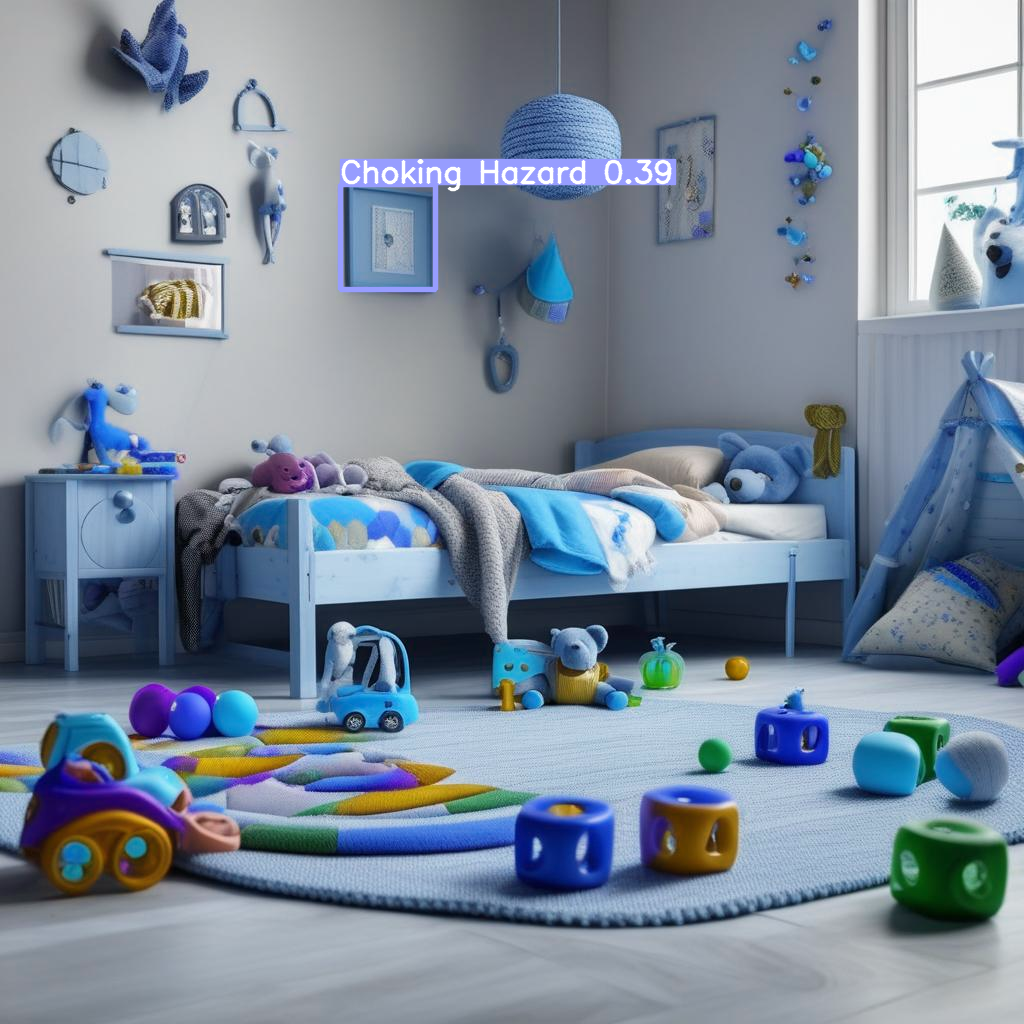

Processing: /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_3.jpg

image 1/1 /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_3.jpg: 640x640 (no detections), 12.7ms
Speed: 8.7ms preprocess, 12.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


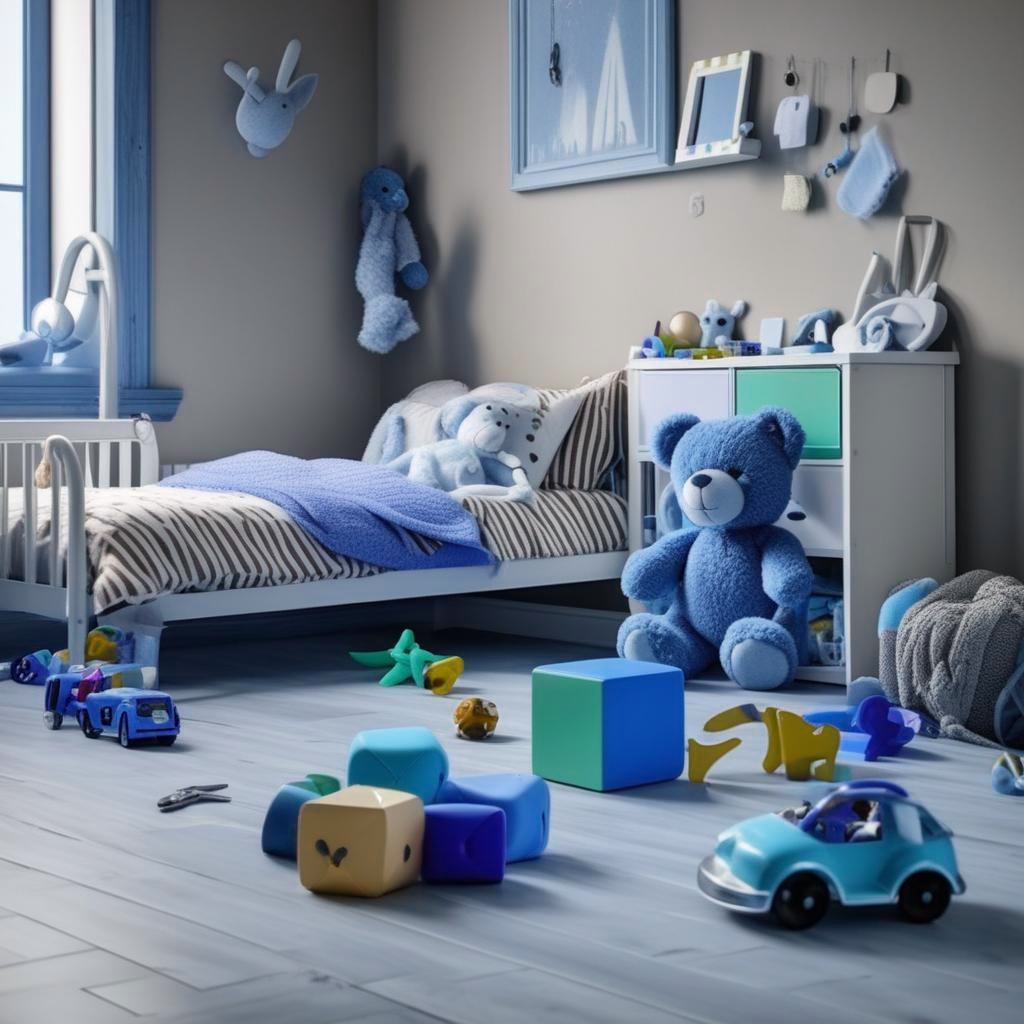

Processing: /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_4.jpg

image 1/1 /content/drive/MyDrive/ChildSafetyProject_SDXL/raw_images/scissors_4.jpg: 640x640 1 Chemical Danger, 8.2ms
Speed: 4.9ms preprocess, 8.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


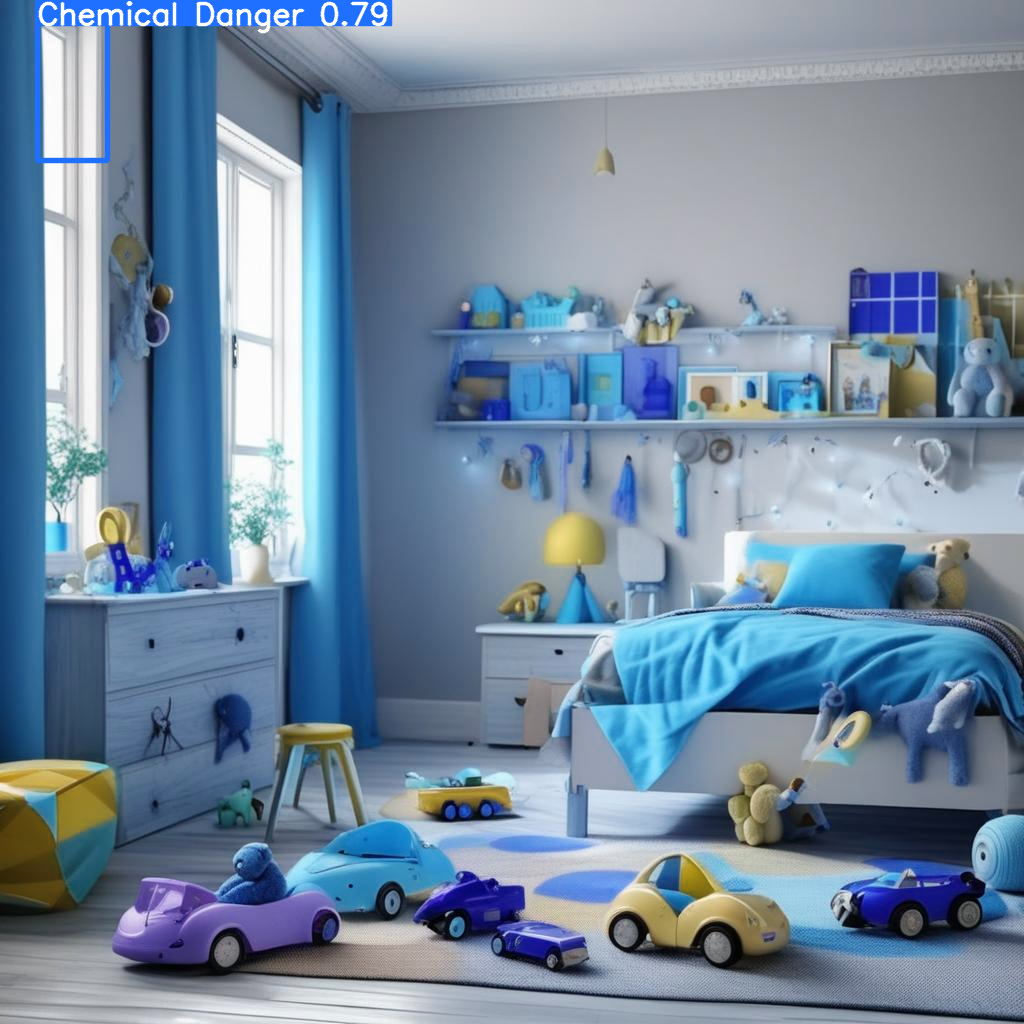

In [26]:
# ==============================
# BLOCK 9: Inference & visualization
# ==============================

from IPython.display import Image, display # Import Image from IPython.display
from PIL import Image as PILImage # Alias PIL.Image to avoid conflict with IPython.display.Image

test_images = [os.path.join(RAW_IMAGES_DIR, f) for f in os.listdir(RAW_IMAGES_DIR) if f.endswith(".jpg")][:5]

for img_path in test_images:
    print(f"Processing: {img_path}")
    results = model(img_path, conf=0.3)
    # Get the annotated image (numpy array)
    annotated_image_array = results[0].plot()
    # Convert numpy array to PIL Image
    annotated_image_pil = PILImage.fromarray(annotated_image_array)
    # Display the PIL Image
    display(annotated_image_pil)